In [4]:
import numpy as np

def null(A, eps=1e-15):
    u, s, vh = np.linalg.svd(A)
    null_space = np.compress(s <= eps, vh, axis=0)
    return null_space.T

In [5]:
A = np.array([
    [1, 2, 3],
    [2, 4, 6],
    [3, 6, 9]
])
print(null(A))

[[ 0.35525278]
 [-0.82809746]
 [ 0.43364738]]


In [18]:
M = np.array([
    [2, 0, 0],
    [0, 2, -1],
    [0, -1, 3]
])
x = np.array([
    [0],
    [0.5],
    [0.5]
])

L = np.matmul(np.transpose(x), np.matmul(M, x))
print(L)
print(L / x[2] / x[2])

[[0.75]]
[[3.]]


In [39]:
import math
from scipy.linalg import null_space

def closest_pt(lines):
    A = np.array(lines)
    M = np.matmul(np.transpose(A), A)
    M = M[:-1, :]
    r = null_space(M)
    print(r)
    #print(r / r[2])

#closest_pt([[0, 1, 0], [1, 0, 0], [math.sqrt(2) / 2, math.sqrt(2) / 2, -math.sqrt(2)]])
#closest_pt([[0, 1, 0], [1, 0, 1], [0, 1, -1], [1, 0, -1]])
#closest_pt([[0, 1, 0], [0, 1, -1]])

[[1.         0.        ]
 [0.         0.4472136 ]
 [0.         0.89442719]]
[[inf 0. ]
 [nan 0.5]
 [nan 1. ]]


<ipython-input-39-529be6602f33>:10: RuntimeWarning: divide by zero encountered in true_divide
  print(r / r[2])
<ipython-input-39-529be6602f33>:10: RuntimeWarning: invalid value encountered in true_divide
  print(r / r[2])


Centered [[-1.6 -3.3]
 [ 0.4  0.7]
 [-2.6 -6.3]
 [ 1.4  3.7]
 [ 2.4  5.2]]
C [[17.2 39.6]
 [39.6 91.8]]
Line slope:  -0.43183907069679817
line:  [[0.39645218]
 [0.91805537]]
[[-3.66390622]
 [ 0.80121963]
 [-6.81452452]
 [ 3.95183793]
 [ 5.72537317]]
[[43.17397029]
 [99.97698962]]
Null []
[[4.31739703e+01]
 [9.99769896e+01]
 [6.39336836e-16]]


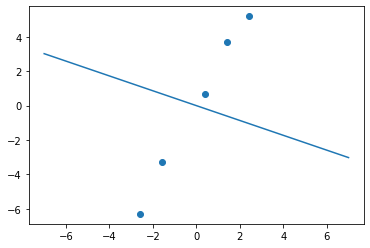

In [105]:
from numpy.linalg import eigh, inv
import matplotlib.pyplot as plt

P = np.array([
    [-1, -2],
    [1, 2],
    [-2, -5],
    [2, 5],
    [3, 6.5]
])

"""
P = np.array([
    [-1, -2],
    [0, 0],
    [0.5, 1]
])
"""
means = np.mean(P, axis=0)
P = P - means
C = np.matmul(np.transpose(P), P)
print("Centered", P)
print("C", C)
w, v = eigh(C)

v_max = v[:, 0]
print("Line slope: ", v_max[1] / v_max[0])
l = np.array([
    [v_max[1]],
    [-v_max[0]],
    [0]
])
print("line: ", l[:2])
print(P @ l[:2])
print(C @ l[:2])
print("Null", null_space(C))

ones = np.ones((P.shape[0], 1))
P_homo = np.hstack((P, ones))
print(np.transpose(P_homo) @ P_homo @ l)

plt.scatter(P[:,0], P[:,1])
plt.plot([-7, 7], [-7 * v_max[1] / v_max[0], 7 * v_max[1] / v_max[0]])

2.3023255813953485
[[-3.55271368e-15]
 [-2.72727273e-01]]


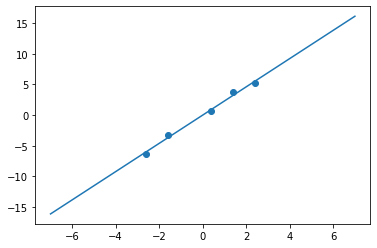

In [102]:
x = P[:, 0]
y = P[:, 1]
b = np.dot(x, y) / np.dot(x, x)
print(b)

l2 = np.array([
    [1],
    [-1/b]
])
print(C @ l2)

plt.scatter(P[:,0], P[:,1])
plt.plot([-7, 7], [-7 * b, 7 * b])